In [219]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline

In [220]:
# Carregar o conjunto de dados
data = pd.read_csv("./dataset/merged_dataset.csv")
data

,frase,sentimento
0,Estou furioso com essa falta de respeito,raiva
1,Estou cansado de lidar com tanta incompetência,raiva
2,Que coisa mais absurda!,raiva
3,Estou indignado com essa falta de consideração,raiva
4,nao quero saber de nada eu te odeio,raiva
...,...,...
3036,Estou radiante de tanto contentamento!,felicidade
3037,Este é o tipo de dia que me faz sentir grato p...,felicidade
3038,A vida me presenteou com motivos de sobra para...,felicidade
3039,Cada novo dia é uma nova oportunidade para ser...,felicidade


In [221]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=set(stopwords.words('portuguese'))
stemmer = nltk.SnowballStemmer("portuguese")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/guilherme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/guilherme/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/guilherme/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [222]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Instancie o lematizador
lemmatizer = WordNetLemmatizer()

In [223]:
# Função clean com lematização
def clean(text):
    text = str(text).lower()
    text = re.sub('[.?]', '', text)
    text = re.sub('https?://\S+|www.\S+', '', text)
    text = re.sub('<.?>+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'@\w+\s', '', text)
    text = re.sub('\w\d\w', '', text)
    text = re.sub(r'[0-9]', '', text)
    words = [word for word in text.split(' ') if word not in stopwords.words('portuguese')]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(lemmatized_words)
    return text

# Aplica a função 'clean' à coluna 'frase' do DataFrame 'data'
data['frase'] = data['frase'].apply(clean)


In [224]:
data

,frase,sentimento
0,furioso falta respeito,raiva
1,cansado lidar tanta incompetência,raiva
2,coisa absurda,raiva
3,indignado falta consideração,raiva
4,nao quero saber nada odeio,raiva
...,...,...
3036,radiante tanto contentamento,felicidade
3037,tipo dia faz sentir grato vivo,felicidade
3038,vida presenteou motivos sobra celebrar felicid...,felicidade
3039,cada novo dia nova oportunidade feliz,felicidade


<AxesSubplot:xlabel='sentimento', ylabel='count'>

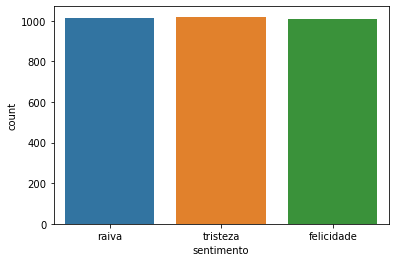

In [225]:
import seaborn as sns
sns.countplot(data=data, x="sentimento")

In [226]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data['frase'], data['sentimento'], test_size=0.2, random_state=42)

In [227]:
#Criar um pipeline que primeiro vetoriza o texto e depois aplica Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [228]:
# Treinar o modelo
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [229]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [230]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

"/content/dataset_sentimentos.csv", accuracy, report

('/content/dataset_sentimentos.csv',
 0.986863711001642,
 '              precision    recall  f1-score   support\n\n  felicidade       0.96      1.00      0.98       199\n       raiva       1.00      0.99      1.00       212\n    tristeza       1.00      0.97      0.98       198\n\n    accuracy                           0.99       609\n   macro avg       0.99      0.99      0.99       609\nweighted avg       0.99      0.99      0.99       609\n')

In [231]:
print(accuracy_score(y_test,y_pred))

0.986863711001642


In [232]:
def prever_sentimento(frase):
    sentimento_predito = model.predict([frase])[0]
    print(f"A frase '{frase}' expressa um sentimento de {sentimento_predito}.")

# Exemplos de teste
prever_sentimento("Hoje é um ótimo dia!")
prever_sentimento("Estou muito triste com essa notícia.")
prever_sentimento("Não acredito que isso aconteceu. Estou irritado!")


A frase 'Hoje é um ótimo dia!' expressa um sentimento de felicidade.
A frase 'Estou muito triste com essa notícia.' expressa um sentimento de tristeza.
A frase 'Não acredito que isso aconteceu. Estou irritado!' expressa um sentimento de raiva.


In [233]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)  # 10-fold cross-validation

print("Accuracy scores for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Accuracy scores for each fold: [0.99180328 0.98770492 0.98765432 0.99176955 0.99176955 0.97942387
 0.98765432 0.98765432 0.98765432 0.99176955]
Mean accuracy: 0.9884857990959993


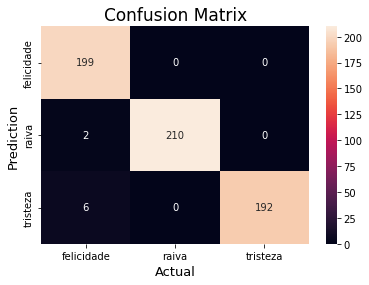

In [234]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix.
    sns.heatmap(cm,
                annot=True,
                fmt='g',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.ylabel('Prediction', fontsize=13)
    plt.xlabel('Actual', fontsize=13)
    plt.title('Confusion Matrix', fontsize=17)
    plt.show()
plot_confusion_matrix(y_test, y_pred)


In [235]:
import joblib

# Nome do arquivo para salvar o modelo
filename = 'modelo_sentimentos.joblib'

# Salvar o modelo utilizando joblib
joblib.dump(model, filename)

print(f"Modelo salvo como {filename}")


Modelo salvo como modelo_sentimentos.joblib
